In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
lung = pd.read_csv('data/LungDisease.csv')

<AxesSubplot:xlabel='Exposure', ylabel='PEFR'>

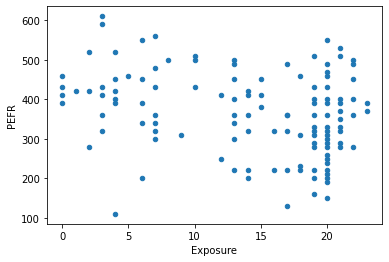

In [4]:
lung.plot.scatter(x='Exposure', y='PEFR')

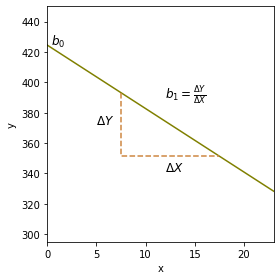

In [18]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(0, 23)
ax.set_ylim(295, 450)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot((0, 23), model.predict([[0], [23]]), color = 'olive')
ax.text(0.4, model.intercept_, r'$b_0$', size='larger')

x = [[7.5], [17.5]]
y = model.predict(x)
ax.plot((7.5, 7.5, 17.5), (y[0], y[1], y[1]), '--', color ='peru')
ax.text(5, np.mean(y), r'$\Delta Y$', size='larger')
ax.text(12, y[1] - 10, r'$\Delta X$', size='larger')
ax.text(12, 390, r'$b_1 = \frac{\Delta Y}{\Delta X}$', size='larger')

plt.tight_layout()
plt.show()

In [6]:
predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


0      -34.582807
1      -14.582807
2        5.417193
3       35.417193
4       -0.398230
          ...    
117    117.477876
118    157.477876
119    167.477876
120     41.662453
121     61.662453
Name: PEFR, Length: 122, dtype: float64


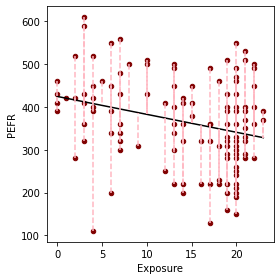

In [26]:
fitted = model.predict(lung[predictors])
residuals = lung[outcome] - fitted

print(residuals)

ax = lung.plot.scatter(x='Exposure', y='PEFR', figsize=(4, 4) , color = 'maroon')
ax.plot(lung.Exposure, fitted , color = 'black')
for x, yactual, yfitted in zip(lung.Exposure, lung.PEFR, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='lightpink')

plt.tight_layout()
plt.show()